In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ppr.path import TolerancedNumber, TrajectoryPt, TrajectoryPtLineTol

## Tolerance along world axes

In [3]:
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 0.8, 1.1, samples=5)
angle = TolerancedNumber(0.0, -np.pi/3, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

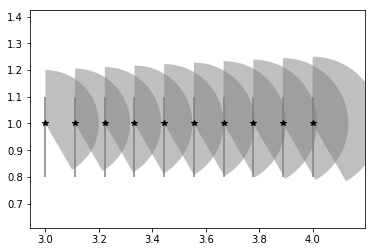

In [4]:
fig1, ax1 = plt.subplots()
ax1.axis('equal')
for tp in path1: tp.plot(ax1)
plt.show()

## Tolerance perpendicular to path

For some problems it is more straightforward to define a tolerance perpendicular on the path. This is achieved using a tolerance along a line making an angle with the x-axis. This angle has to be set for every path point perpendicular to the path.

The example below shows how to to this for an arc segement.

In [5]:
angle = TolerancedNumber(0.0, -0.2, 0.3)
v = TolerancedNumber(0, -1, 2, samples=4)
path2 = []

# create circular path with parameter equations
t = np.linspace(0, np.pi/2, 6); R = 5;

for ti in t:
    pi = [R * np.cos(ti), R * np.sin(ti), angle]
    path2.append(TrajectoryPtLineTol(pi, v, ti))

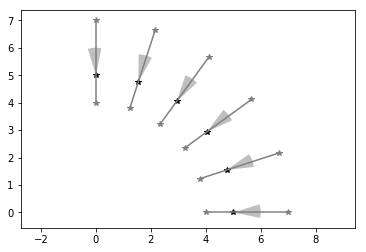

In [6]:
fig2, ax2 = plt.subplots()
for tp in path2: tp.plot(ax2, wedge_radius=1.0)
plt.axis('equal')
plt.show()

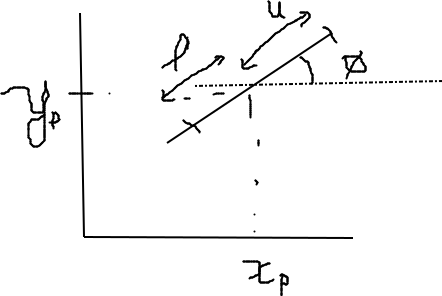

The main problem here is that for the optimization approach, the path constraints on the x and y values become dependent. Together they will add two inequality constraints.

In addition in equality constraint is added to define this dependence / keep them on one line.

A simple way to add this would be using the parameter equations of the line segments. The drawback is that an extra optimization variable is added.

$$ x = x_p + t \; cos(\phi) \\
    y = y_p + t \; sin(\phi) \\
    -l < t < u$$

We could also eliminate the parameter $t$. Then we have one equality constraint:
    
$$ sin(\phi) x - cos(\phi) y = sin(\phi) x_p - cos(\phi) y_p $$

But the expression of the inequality constraint would depend on the angle to avoid singularities.
$$ -l < \frac{y - y_p}{sin(\phi)} < u \quad \text{for} \; sin(\phi) \neq 0 $$
or
$$ -l < \frac{x - x_p}{cos(\phi)} < u \quad \text{for} \; cos(\phi) \neq 0 $$

In addition the angle $\phi$ could also vary if the orientation is toleranced.

Rewriting it in a general form, we get 1 equality constraint and 4 inequality constraints:

$$ sin(\phi) (x - x_p) - cos(\phi) (y - y_p) = 0 \\
   -y + y_p -l \; sin(\phi) < 0 \\
    y - y_p - u \; sin(\phi) < 0 \\
   -x + x_p -l \; cos(\phi) < 0 \\
    x - x_p - u \; cos(\phi) < 0  $$

Therefore it seems that the parameter equation with 2 equality constraints and 2 inequality constraints is a more efficient way to express this type of path constraints.